# Welcome to Fuzzy Corn!

This Jupyter notebook will walk you through the process of 
evaluating how suited your soil is for growing corn. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import ipywidgets as widgets
from IPython.display import display

First, we need to define the AND operator we will use in our decision making.

In [2]:
# define the AND operator using Yager's definition
def yager_and(x, y, w): # w is the weight, w > 0
    return 1 - np.minimum(1, ((1-x)**w + (1-y)**w)**(1/w))

Then, we'll define the domains for all of our linguistic variables as well as the membership functions for the various linguistic values.

In [3]:
sample_size = 1000

#temp domain:  0 - 100 (F)
domain_temp = np.linspace(0,100,sample_size)
temp_cold = fuzz.trapmf(domain_temp,[0,0,40,70])
temp_warm = fuzz.trapmf(domain_temp,[60,75,85,95])
temp_hot = fuzz.trapmf(domain_temp,[90,95,100,100])

#particle size domain: 1 - 10 mm 
domain_part = np.linspace(0,10,sample_size)
part_small = fuzz.trapmf(domain_part,[0,0,0.25,0.5])
part_med = fuzz.trapmf(domain_part,[0,0.5,1.5,2])
part_large = fuzz.trapmf(domain_part,[1.5,3,10,10])

#organic matter domain: 0 - 7%
domain_org = np.linspace(0,7,sample_size)
org_low = fuzz.trapmf(domain_org,[0,0,1.5,2])
org_ave = fuzz.trapmf(domain_org,[1.5,2,3,3.5])
org_high = fuzz.trapmf(domain_org,[3,3.5,7.0,7.0])

#depth domain: 0 - 100 inches
domain_depth = np.linspace(0,100,sample_size)
depth_shallow = fuzz.trapmf(domain_depth,[0,0,15,25])
depth_mod = fuzz.trapmf(domain_depth,[15,20,35,45])
depth_deep = fuzz.trapmf(domain_depth,[40,50,100,100])

#bulk density domain: 0 - 5 g/cm^3
domain_bulk = np.linspace(0,5,sample_size)
bulk_low = fuzz.trapmf(domain_bulk,[0,1.2,1.3,1.5])
bulk_med = fuzz.trapmf(domain_bulk,[1.3,1.7,2.0,2.5])
bulk_high = fuzz.trapmf(domain_bulk,[2.0,3.0,5.0,5.0])


To visualize the membership functions, let's create a function to plot them.

In [4]:
def addsubplot(ax,x_sample,var,var_name,title,xaxis):
    ax.plot(x_sample, var[0], 'g', linewidth=1.5, label=var_name[0])
    ax.plot(x_sample, var[1], 'y', linewidth=1.5, label=var_name[1])
    ax.plot(x_sample, var[2], 'r', linewidth=1.5, label=var_name[2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_ylabel("Membership")
    ax.set_xlabel(xaxis)
    ax.set_title(title)
    ax.legend()

Using the function we just made, let's plot all of our linguistic variables and their values.

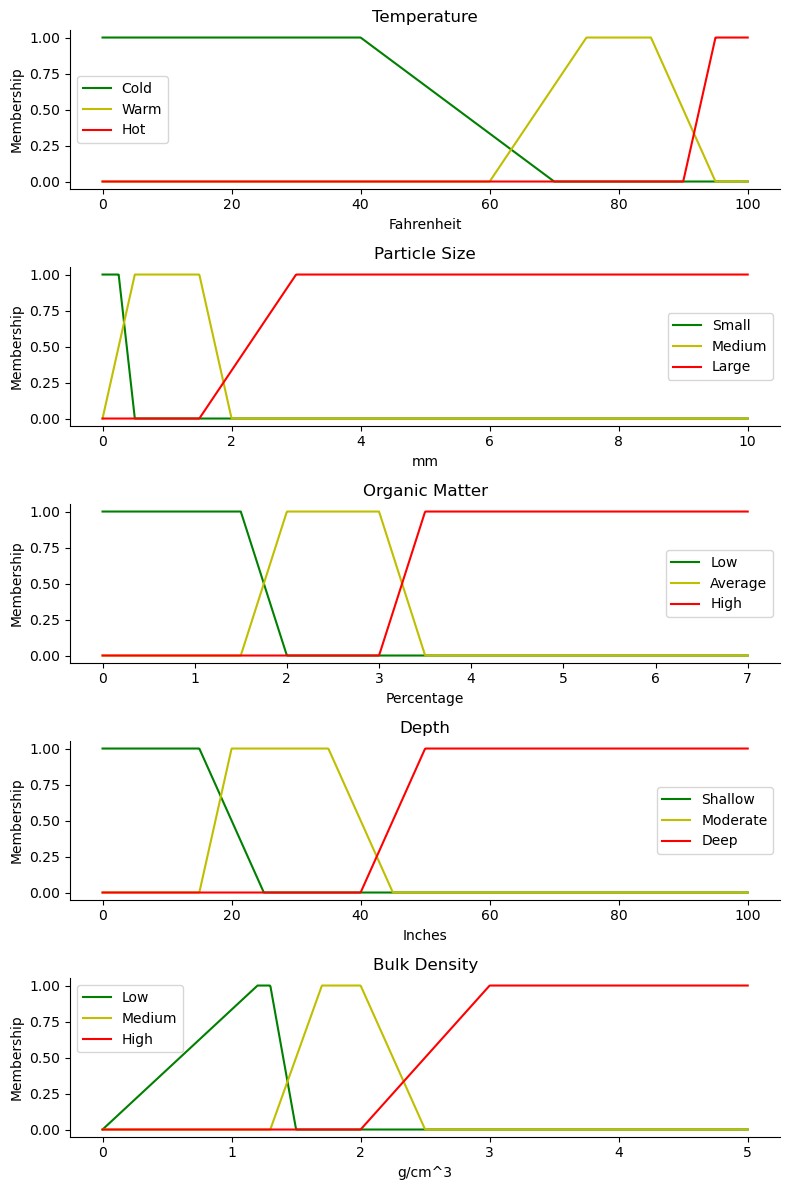

In [5]:
fig,(ax0,ax1,ax2,ax3,ax4) = plt.subplots(nrows=5, figsize=(8, 12))
var_mf = [temp_cold,temp_warm,temp_hot]
name_mf = ["Cold","Warm","Hot"]
addsubplot(ax0,domain_temp,var_mf,name_mf,"Temperature","Fahrenheit")

var_mf = [part_small,part_med,part_large]
name_mf = ["Small","Medium","Large"]
addsubplot(ax1,domain_part,var_mf,name_mf,"Particle Size","mm")

var_mf = [org_low,org_ave,org_high]
name_mf = ["Low","Average","High"]
addsubplot(ax2,domain_org,var_mf,name_mf,"Organic Matter","Percentage")

var_mf = [depth_shallow,depth_mod,depth_deep]
name_mf = ["Shallow","Moderate","Deep"]
addsubplot(ax3,domain_depth,var_mf,name_mf,"Depth","Inches")

var_mf = [bulk_low, bulk_med, bulk_high]
name_mf = ["Low","Medium","High"]
addsubplot(ax4,domain_bulk,var_mf,name_mf,"Bulk Density","g/cm^3")



plt.tight_layout()

Looking good! Now, we'll define a class to describe a soil object. Then we'll make a function to evaluate a given soil object.

In [6]:
output = widgets.Output()

class soil:
    def __init__(self, temp, part_size, org_matter, depth, density):
        self.temp = temp
        self.part_size = part_size
        self.org_matter = org_matter
        self.depth = depth
        self.density = density
    def eval_soil(self):
        # fuzzify
        temp = fuzz.interp_membership(domain_temp,temp_warm,self.temp)
        part = fuzz.interp_membership(domain_part,part_med,self.part_size)
        org = fuzz.interp_membership(domain_org,org_high,self.org_matter)
        depth = fuzz.interp_membership(domain_depth,depth_deep,self.depth)
        bulk = fuzz.interp_membership(domain_bulk,bulk_low,self.density)

        with output:
            print("temperature score:",temp,"\n",
                  "particle size score:",part,"\n",
                  "organic matter score:",org,"\n",
                  "depth score:",depth,"\n",
                  "bulk density score: ",bulk,"\n")
    
        # and all of them
        score = yager_and(temp, yager_and(part, yager_and(org, yager_and(depth, bulk, w), w), w), w)
        with output:
            if score == 1:
                print("Hooray! You corned!")
            print("Your score is: ",score)
    

def eval_soil (soil, w):
    # fuzzify
    temp = fuzz.interp_membership(domain_temp,temp_warm,soil.temp)
    part = fuzz.interp_membership(domain_part,part_med,soil.part_size)
    org = fuzz.interp_membership(domain_org,org_high,soil.org_matter)
    depth = fuzz.interp_membership(domain_depth,depth_deep,soil.depth)
    bulk = fuzz.interp_membership(domain_bulk,bulk_low,soil.density)

    print("temperature score:",temp,"\n",
          "particle size score:",part,"\n",
          "organic matter score:",org,"\n",
          "depth score:",depth,"\n",
          "bulk density score: ",bulk,"\n")

    # AND all of them
    score = yager_and(temp, yager_and(part, yager_and(org, yager_and(depth, bulk, w), w), w), w)
    return score

Testing out our work so far with a random soil object: 

In [7]:
w = 1000
the_soil = soil(64,1,4,60,1.25)

print(eval_soil(the_soil,w))

temperature score: 0.26666666666666666 
 particle size score: 1.0 
 organic matter score: 1.0 
 depth score: 1.0 
 bulk density score:  1.0 

0.2666666666666666


Now that we know it works, let's play a little game. 

In [8]:
#formatting 
right_aligned_layout = widgets.Layout(justify_content='flex-end', width='50%')
description_layout = widgets.Layout(width='150px')
slider_layout = widgets.Layout(width='60%') 

#sliders to make the game work
slider1 = widgets.IntSlider(value=0, min=0, max=100, description="Temperature (F):",layout=slider_layout, style={'description_width': 'initial'})
slider2 = widgets.FloatSlider(value=0, min=0, max=10,step=0.1, description="Particle Size (mm):",layout=slider_layout, style={'description_width': 'initial'})
slider3 = widgets.FloatSlider(value=0, min=0, max=7,step=0.1, description="Organic Matter (%):",layout=slider_layout, style={'description_width': 'initial'})
slider4 = widgets.IntSlider(value=0, min=0, max=100, description="Depth (in):",layout=slider_layout, style={'description_width': 'initial'})
slider5 = widgets.FloatSlider(value=0, min=0, max=5,step=0.1, description="Bulk Density (g/cm^3):",layout=slider_layout, style={'description_width': 'initial'})


created_object = None

Title = widgets.Output()
with Title:
    print("Can you create the perfect soil for corn?")
    print("The goal is to get a final score of 1.")
    print("Your soil wants to be warm, have medium particle size, have plenty of organic matter,")
    print("be deep enough, and have a low bulk density.")
    print("Use the sliders to adjust your soil's attributes!")

def create_object(button):
    global created_object
    created_object = soil(slider1.value, slider2.value, slider3.value,slider4.value,slider5.value)
    with output:
        output.clear_output()
        print("Soil created")
        
def run_object_function(button):
    if created_object:
        created_object.eval_soil()
    else:
        with output:
            output.clear_output()
            print("You need to create an object first.")


button = widgets.Button(description="Create Soil")
button.on_click(create_object)

run_button = widgets.Button(description="Evaluate Soil")
run_button.on_click(run_object_function)


display(Title,slider1, slider2, slider3,slider4,slider5, button,run_button,output)

Output()

IntSlider(value=0, description='Temperature (F):', layout=Layout(width='60%'), style=SliderStyle(description_w…

FloatSlider(value=0.0, description='Particle Size (mm):', layout=Layout(width='60%'), max=10.0, style=SliderSt…

FloatSlider(value=0.0, description='Organic Matter (%):', layout=Layout(width='60%'), max=7.0, style=SliderSty…

IntSlider(value=0, description='Depth (in):', layout=Layout(width='60%'), style=SliderStyle(description_width=…

FloatSlider(value=0.0, description='Bulk Density (g/cm^3):', layout=Layout(width='60%'), max=5.0, style=Slider…

Button(description='Create Soil', style=ButtonStyle())

Button(description='Evaluate Soil', style=ButtonStyle())

Output()